<a href="https://colab.research.google.com/github/GenoKiller777/PythonMyFirstNeuronalNetwork/blob/main/EvaluacionFinal_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving hespe-data.csv to hespe-data.csv
User uploaded file "hespe-data.csv" with length 11407 bytes


### Importación de paquetes.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from keras import models
from keras import layers
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout

from tensorflow.keras.utils import plot_model

from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

### Importamos el dataset.

In [ ]:
df = pd.read_csv('hespe-data.csv',sep=';')

### Estudio de Metadatos.

In [ ]:
df.shape

(145, 33)

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

student_id                      0
age                             0
sex                             0
graduated_h_school_type         0
scholarship_type                0
additional_work                 0
activity                        0
partner                         0
total_salary                    0
transport                       0
accomodation                    0
mother_ed                       0
farther_ed                      0
siblings                        0
parental_status                 0
mother_occup                    0
father_occup                    0
weekly_study_hours              0
reading_non_scientific          0
reading_scientific              0
attendance_seminars_dep         0
impact_of_projects              0
attendances_classes             0
preparation_midterm_company     0
preparation_midterm_time        0
taking_notes                    0
listenning                      0
discussion_improves_interest    0
flip_classrom                   0
grade_previous

### Preprocesamiento del dataset.

In [ ]:
df_Target = df[['grade']]

In [ ]:
df_Features = df[['age','sex','graduated_h_school_type','scholarship_type','additional_work','activity','partner','total_salary',
        'transport','accomodation','mother_ed','farther_ed','siblings','parental_status','mother_occup','father_occup',
        'weekly_study_hours','reading_non_scientific','reading_scientific','attendance_seminars_dep','impact_of_projects','attendances_classes','preparation_midterm_company','preparation_midterm_time',
        'taking_notes','listenning','discussion_improves_interest','flip_classrom','grade_previous','grade_expected','course_id']]

#### Re - Codifiación de la variable Target Grade.

La recodificación  se realizo porque el modelo no generalizaba las 8 variables, por que se recodificacron en 5 labels para reducir su complicalidad [Fail; D; C; B; A].

In [ ]:
conditions = [
    (y['grade'] == 0),
    (y['grade'] == 1),
    (y['grade'] == 2),
    (y['grade'] == 3),
    (y['grade'] == 4),
    (y['grade'] == 5),
    (y['grade'] == 6),
    (y['grade'] == 7)]



choices = [0, 1,1,2,2,3,3,4]
y['grade'] = np.select(conditions,choices, default=0)

<ipython-input-9-fe5609439a59>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['grade'] = np.select(conditions,choices, default=0)


#### Binarización a variable Grade.

In [ ]:
encoder = OneHotEncoder()

encoded_Y = encoder.fit(y.values.reshape(-1,1))
encoded_Y = encoded_Y.transform(y.values.reshape(-1,1)).toarray()

encoded_Y

In [ ]:
encoded_Y.shape

(145, 5)

#### Validación cruzada del dataset.

In [ ]:
train_ratio = 0.8
test_ratio = 0.2

# Generate TrainX and TrainY
trainX, testX, trainY, testY = train_test_split(X, encoded_Y, test_size= 1 - train_ratio)

### Red Neuronal ANN

In [ ]:
model = Sequential()
model.add(Dense(100, input_shape = (31,), activation = "relu"))
model.add(Dense(100, activation = "relu"))
model.add(Dense(100, activation = 'tanh'))
model.add(Dense(100, activation = 'sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(5, activation = "softmax"))

#### Optimizador.

In [ ]:
optimizer = Adam(learning_rate = 0.0001)
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])

#### Plot de la Red ANN

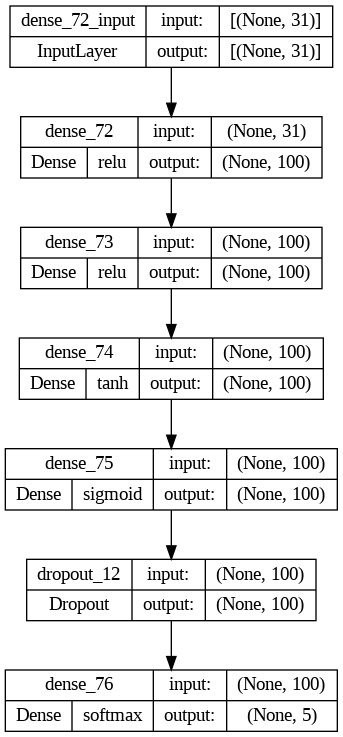

In [ ]:
plot_model(model, show_shapes = True, show_layer_activations = True)

In [ ]:
history = model.fit(trainX,
                    trainY,
                    epochs=10000,
                    validation_data=(testX, testY))

Se han truncado las últimas 5000 líneas del flujo de salida.
4/4 [==============================] - 0s 27ms/step - loss: 8.5296e-08 - accuracy: 1.0000 - val_loss: 5.8253 - val_accuracy: 0.4483
Epoch 7502/10000
4/4 [==============================] - 0s 35ms/step - loss: 7.5020e-08 - accuracy: 1.0000 - val_loss: 5.8110 - val_accuracy: 0.4828
Epoch 7503/10000
4/4 [==============================] - 0s 29ms/step - loss: 3.3913e-08 - accuracy: 1.0000 - val_loss: 5.8055 - val_accuracy: 0.4828
Epoch 7504/10000
4/4 [==============================] - 0s 27ms/step - loss: 5.8577e-08 - accuracy: 1.0000 - val_loss: 5.7998 - val_accuracy: 0.4828
Epoch 7505/10000
4/4 [==============================] - 0s 30ms/step - loss: 6.2688e-08 - accuracy: 1.0000 - val_loss: 5.7956 - val_accuracy: 0.4828
Epoch 7506/10000
4/4 [==============================] - 0s 32ms/step - loss: 3.0830e-08 - accuracy: 1.0000 - val_loss: 5.7938 - val_accuracy: 0.4828
Epoch 7507/10000
4/4 [==============================] - 0s 32m

### Predicción.

In [ ]:
y_pred = model.predict(testX)

1/1 [==============================] - 0s 77ms/step


In [ ]:
y_pred_clase = np.argmax(y_pred, axis=1)

In [ ]:
y_test_clase = np.argmax(testY, axis=1)

#### Precisión del modelo.

In [ ]:
accuracy_score(y_pred_clase,y_test_clase)

0.5172413793103449

#### Matriz de confusión.

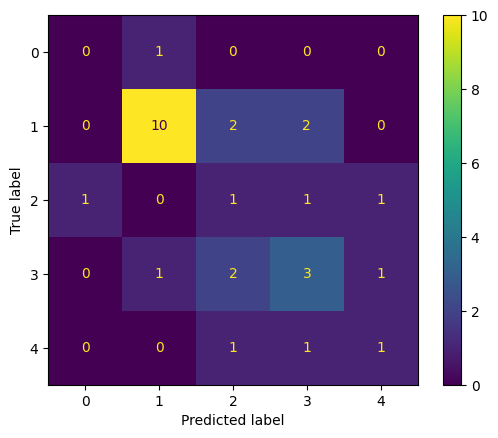

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix( y_test_clase, y_pred_clase)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

### Graficar métricas vs epochs (train y test)

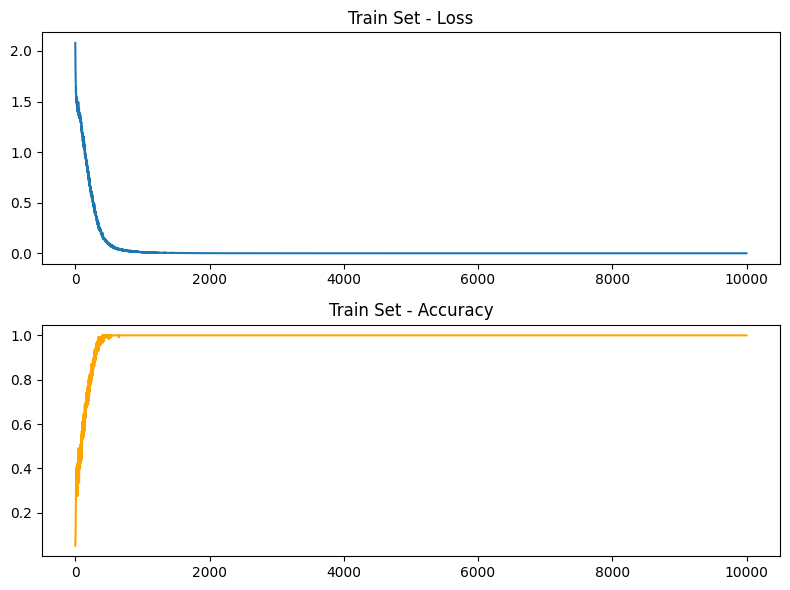

In [ ]:
plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.title('Train Set - Loss')
plt.plot(history.history['loss'])
plt.subplot(2,1,2)
plt.title('Train Set - Accuracy')
plt.plot(history.history['accuracy'],color ='orange')

plt.tight_layout()
plt.show()

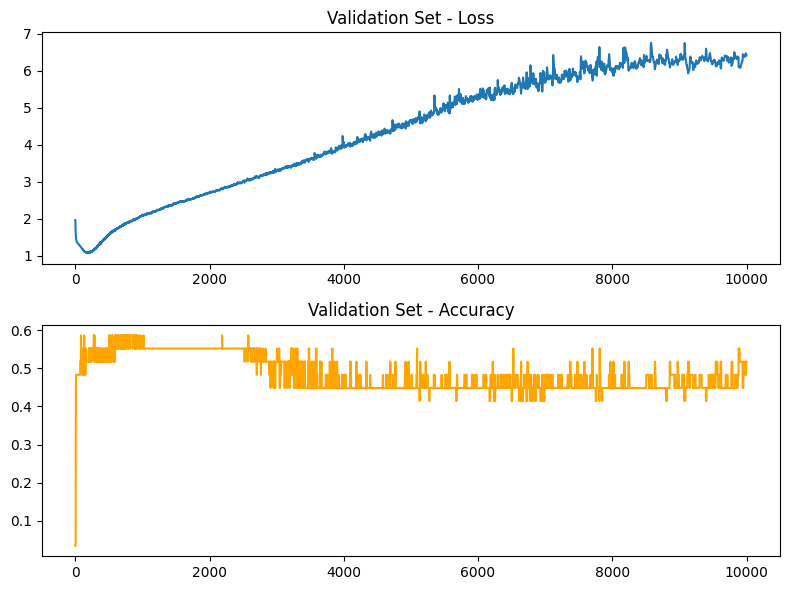

In [ ]:
plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.title('Validation Set - Loss')
plt.plot(history.history['val_loss'])
plt.subplot(2,1,2)
plt.title('Validation Set - Accuracy')
plt.plot(history.history['val_accuracy'],color ='orange')

plt.tight_layout()
plt.show()


# Conclusiones:

Realice demasiadas iteraciones y no pude mejorar el modelo, la que prepare fue la mejor que obtuve, tal vez puede ser por la naturaleza de las variables cualitativas nominales ya que estas se deben Binarizar con Dummy pero realice ese tratamiento y tampoco obtuve buenos resultados, tal vez la respuesta al problema era la utilización de una red de tipo Deep Learning generativo, pero en conclusión aprendí arto sobre el tema, tal vez me falto realizar un balanceo de labels de la variable target.
